In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
head_list = ["nTracks","nShowers","nVertex","trkE","EmE","pidaLong","pidaShort","lenLong","lenShort","visE","pLong","trackEfrac","nFlashes","flashPE","sig"]
atmo = pd.read_csv("atmotree.csv",names=head_list,header=None,index_col=False)
pdk = pd.read_csv("pdktree.csv",names=head_list,header=None,index_col=False)

# Signal and background csvs are imported, as well as necessary libraries. Look to see they have expected behavior.

In [3]:
atmo.head()

nTracks  nShowers  nVertex  trkE  EmE  pidaLong  pidaShort   lenLong  \
0        4         3        8     0    0   2.80234    0.00000  32.28260   
1        2         0        3     0    0   7.25686    3.42414  22.88710   
2        2         0        3     0    0  16.05470   24.33140   9.66974   
3        2         0        3     0    0   9.95274   16.83320  27.91820   
4        4         0        5     0    0   4.32084    3.04405  91.82640   

   lenShort  visE     pLong  trackEfrac  nFlashes    flashPE  sig  
0   0.00000     0  0.181436    0.000000         2  4324.7500    0  
1   3.26208     0  0.155040    0.638613         2    65.1302    0  
2   2.66706     0  0.109716    0.365521         2    83.0714    0  
3  18.74930     0  0.169489    0.887705         2    78.9774    0  
4   5.22213     0  0.321967    0.000000         2  2062.8600    0

In [4]:
pdk.head()

nTracks  nShowers  nVertex  trkE  EmE  pidaLong  pidaShort  lenLong  \
0        2         0        3     0    0   6.58654    5.87317  48.6192   
1        2         0        3     0    0   8.64484    4.02827  51.2072   
2        3         0        4     0    0   5.81910   39.44040  14.6574   
3        2         0        3     0    0  10.86520   11.28500  34.3021   
4        2         0        3     0    0   9.38759    9.70459  50.4080   

   lenShort  visE     pLong  trackEfrac  nFlashes    flashPE  sig  
0  15.53310     0  0.222760    0.657262         2  1333.5800    1  
1   7.49073     0  0.228995    0.709013         2   564.0920    1  
2   3.74200     0  0.128947    0.298063         1   284.0100    1  
3  22.75140     0  0.186802    0.799846         3    92.4554    1  
4  12.87600     0  0.227076    0.868688         1    56.5050    1

In [5]:
pdk_df = atmo
pdk_df=pdk_df.append(pdk,ignore_index=True)
pdk_df=pdk_df.drop(["trkE","EmE","visE"],axis=1)

In [6]:
import seaborn as sb

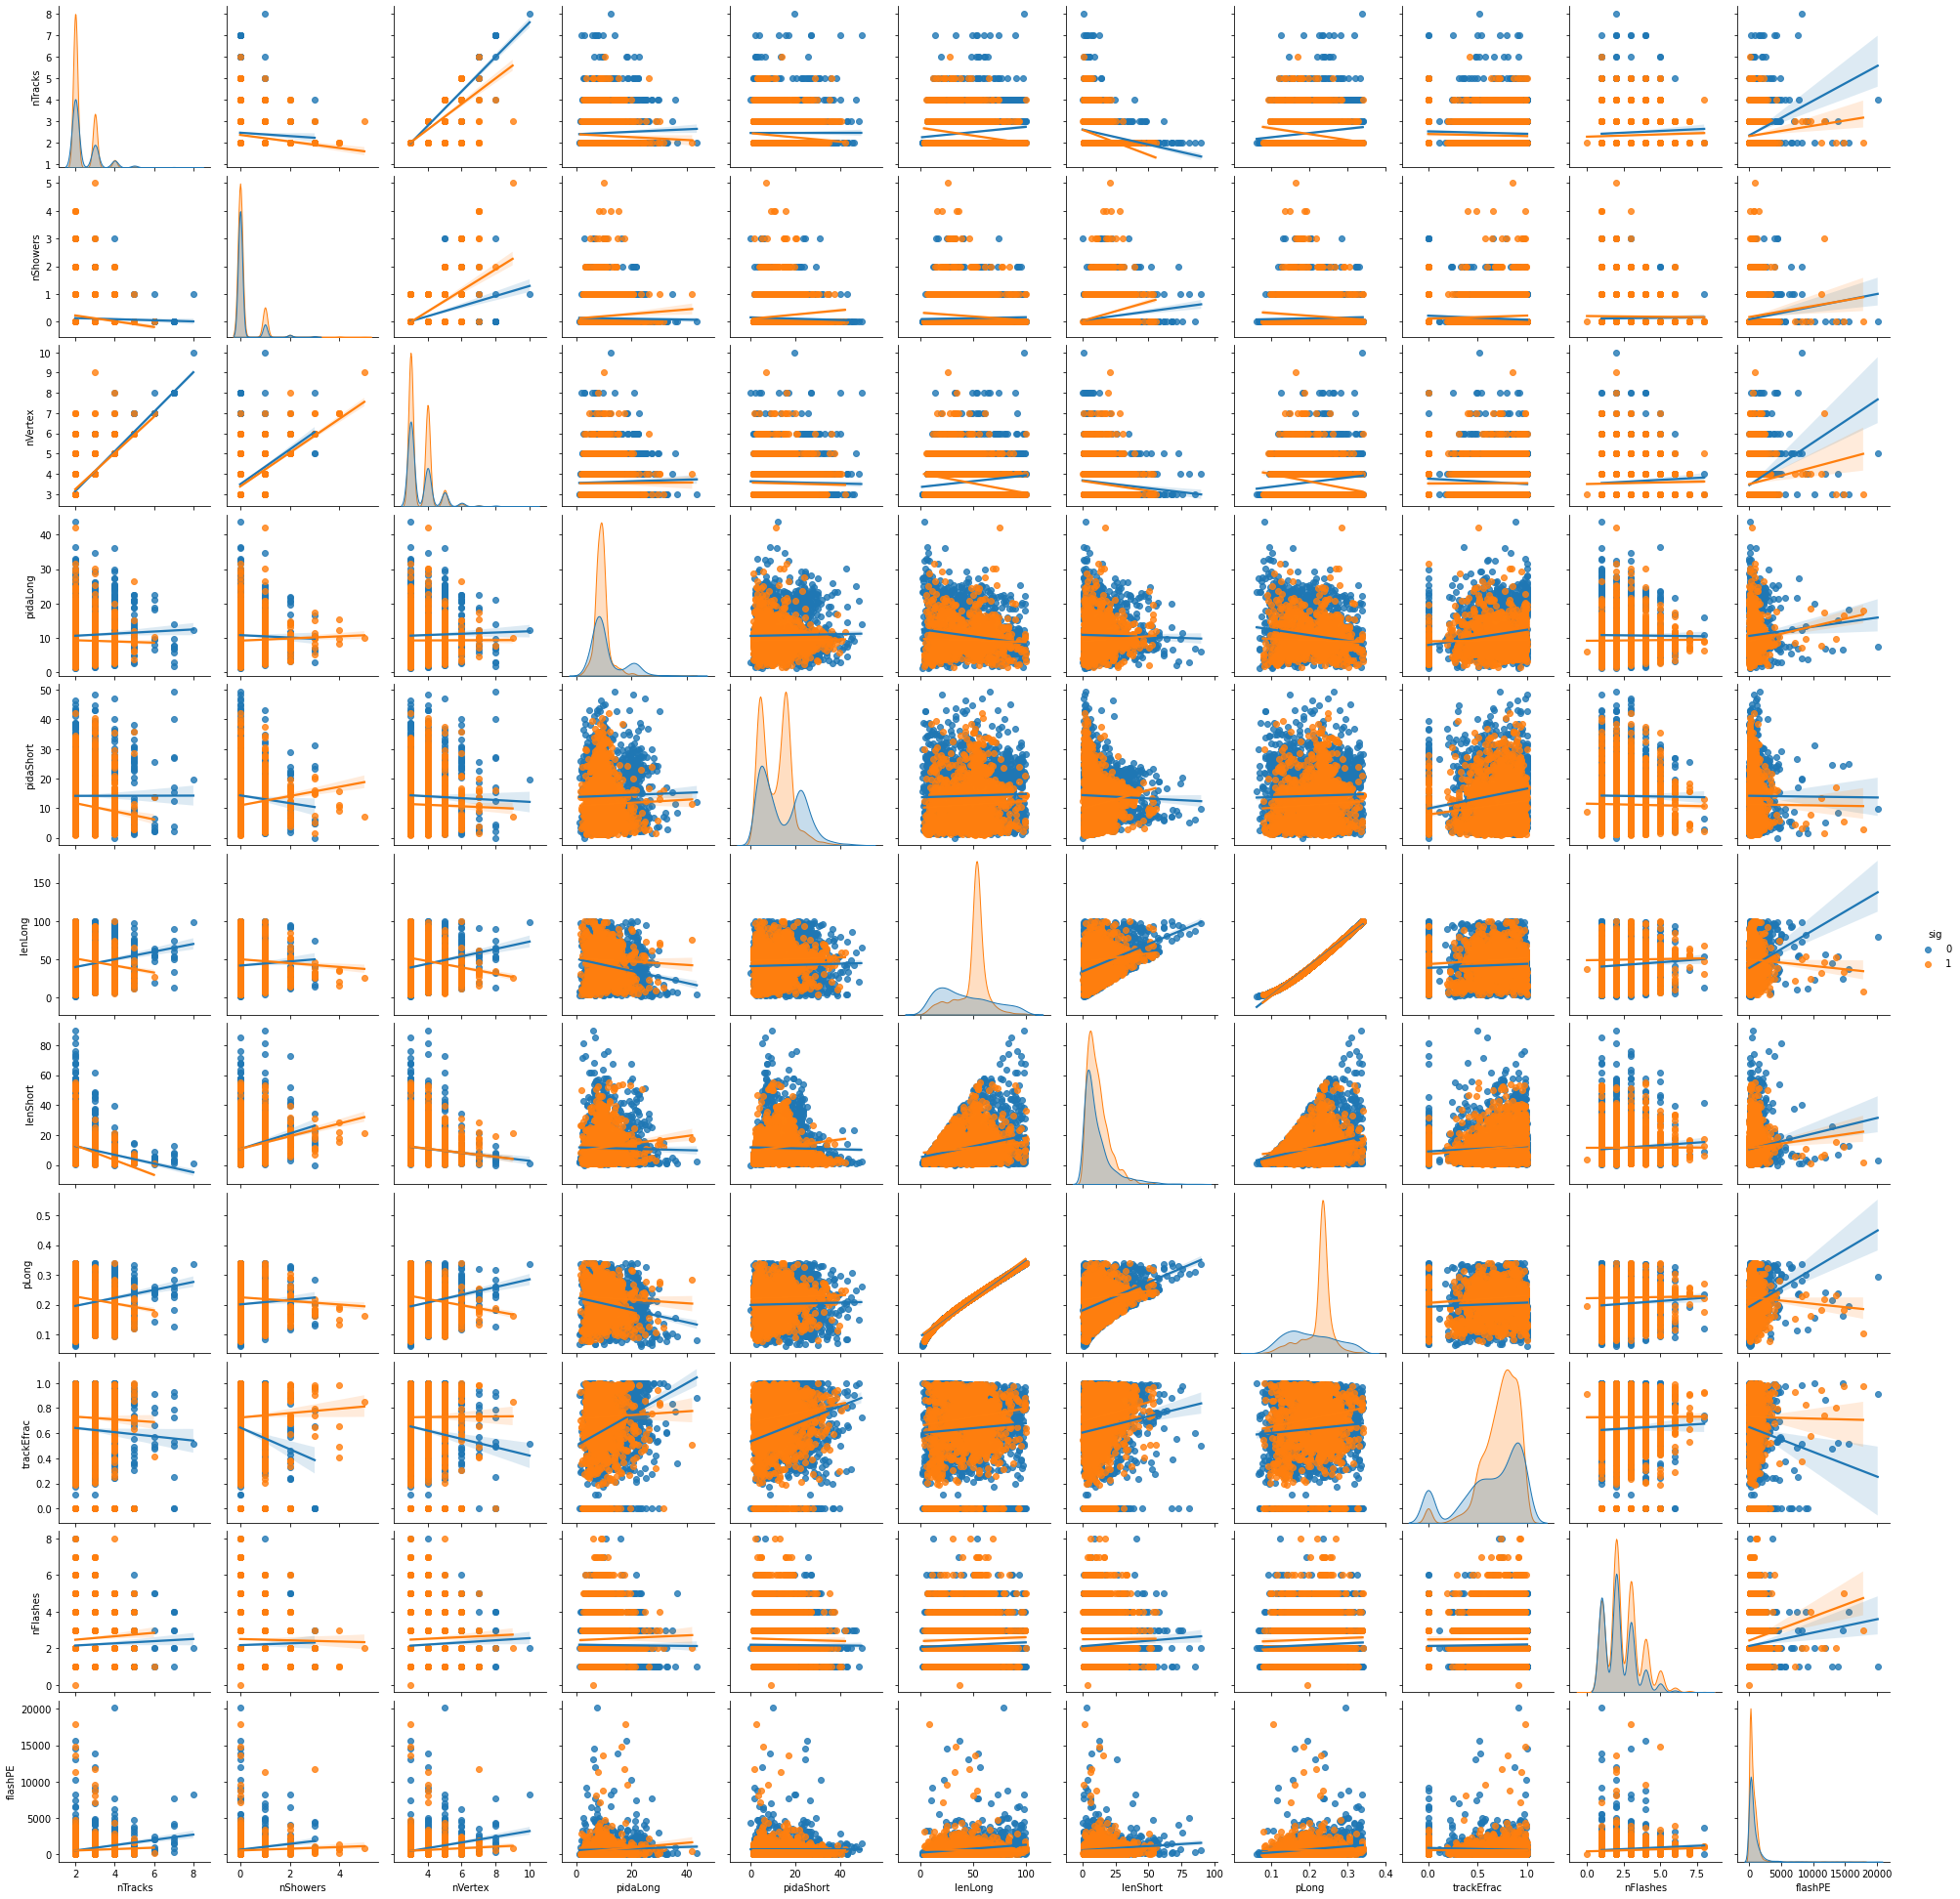

In [7]:
sb.pairplot(data=pdk_df,kind="reg",hue="sig")

In [8]:
pdk_target = pdk_df.sig

### Pull off the "signal" column to use as the target for our ML models

In [9]:
pdk_target
pdk_df=pdk_df.drop(["sig"],axis=1)

### Use 70% of the sample as a training set, and split here. Have a look to make sure it makes sense

In [10]:
X_train, X_test, y_train, y_test =train_test_split(pdk_df, pdk_target, test_size = 0.3)
X_train.head()

nTracks  nShowers  nVertex  pidaLong  pidaShort  lenLong  lenShort  \
4022        2         0        3   8.91476    2.03628  55.1547   3.15453   
2095        2         2        5   3.23912    7.76083  95.1168  73.00950   
45          2         0        3   8.62297    2.61703  18.3926   1.05962   
4559        3         0        4   6.83119   22.05270  55.9849   5.76616   
2879        2         0        3   7.43820    7.02059  53.0744  11.58380   

         pLong  trackEfrac  nFlashes   flashPE  
4022  0.238401    0.562012         1   837.130  
2095  0.329263    0.000000         3  4005.370  
45    0.141360    0.000000         2   869.153  
4559  0.240364    0.886995         2   142.605  
2879  0.233459    0.670631         4   855.490

In [11]:
y_train.head()

4022    1
2095    0
45      0
4559    1
2879    1
Name: sig, dtype: int64

In [12]:
from sklearn import tree
from sklearn import svm

## Here we make our ML models. First a decision tree, we do nothing special to it and let it find its own path

In [13]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

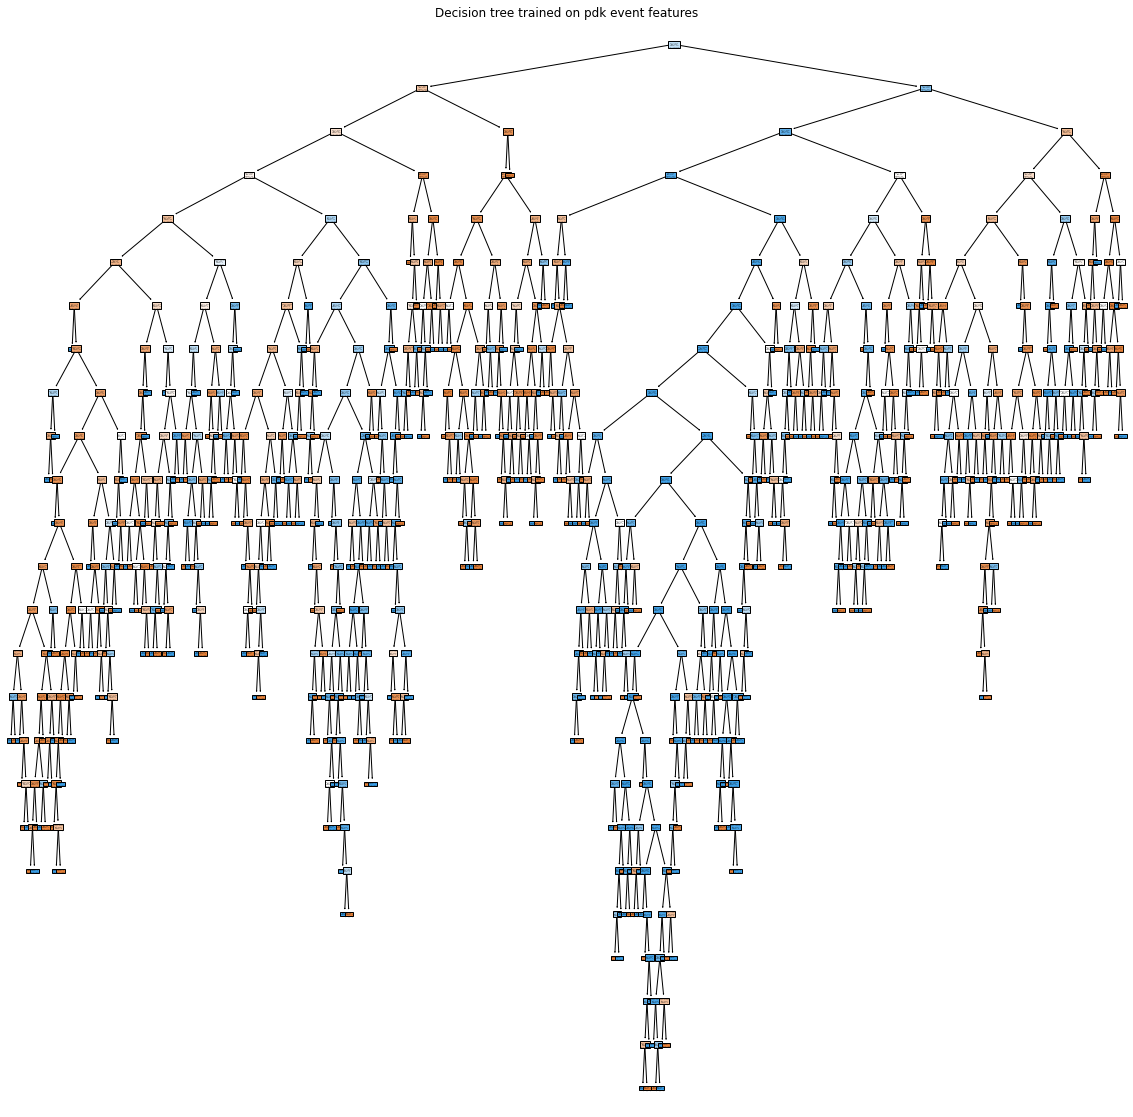

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=[20,20])
plot_tree(clf, filled=True)
plt.title("Decision tree trained on pdk event features")
plt.show()

In [15]:
clf.predict(X_test)

array([1, 1, 0, ..., 0, 1, 1])

In [16]:
clf_score = clf.score(X_test,y_test)
print("The score of the Decision tree classifier is ", clf_score )

The score of the Decision tree classifier is  0.7700865265760197


In [17]:
for i in ["sig","trkE","EmE","visE"]:
    head_list.remove(i)

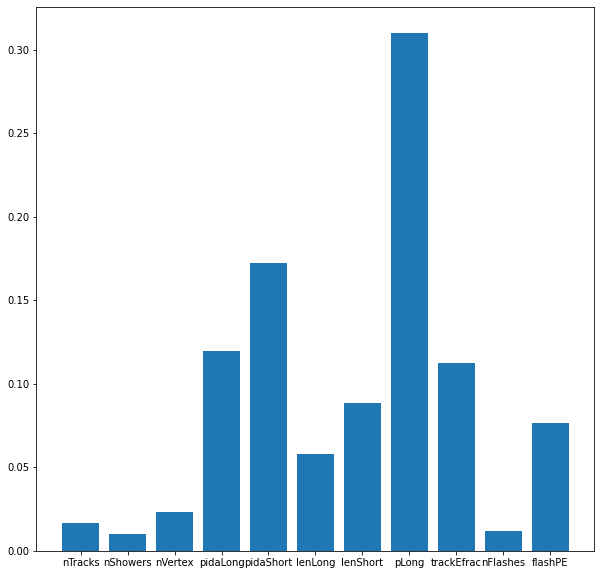

In [18]:
plt.figure(figsize=[10,10])
plt.bar(head_list,clf.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

## Here we try a Gradient Boosting Classifier

In [19]:
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [20]:
gbc = ensemble.GradientBoostingClassifier()

In [21]:
gbc.fit(X_train,y_train)
gbc_preds=gbc.predict(X_test)

In [22]:
gbc_score= gbc.score(X_test,y_test)
print(gbc_score)

0.8411619283065513


It does pretty okay, but can we improve some

In [23]:
classification_report(y_test,gbc_preds)

'              precision    recall  f1-score   support\n\n           0       0.83      0.77      0.80       666\n           1       0.85      0.89      0.87       952\n\n    accuracy                           0.84      1618\n   macro avg       0.84      0.83      0.83      1618\nweighted avg       0.84      0.84      0.84      1618\n'

In [24]:
confusion_matrix(y_test,gbc_preds)

array([[515, 151],
       [106, 846]])

In [25]:
y_scores_gb = gbc.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.92


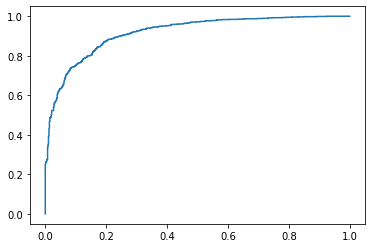

In [26]:
plt.figure()
plt.plot(fpr_gb,tpr_gb)

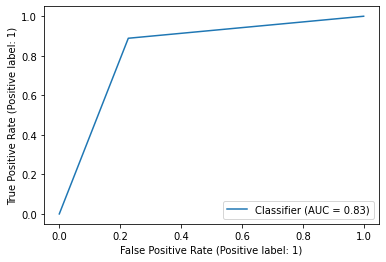

In [27]:
RocCurveDisplay.from_predictions(y_test,gbc_preds)

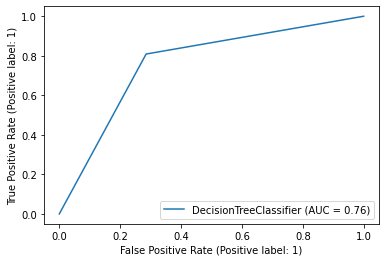

In [28]:
RocCurveDisplay.from_estimator(clf,X_test,y_test)

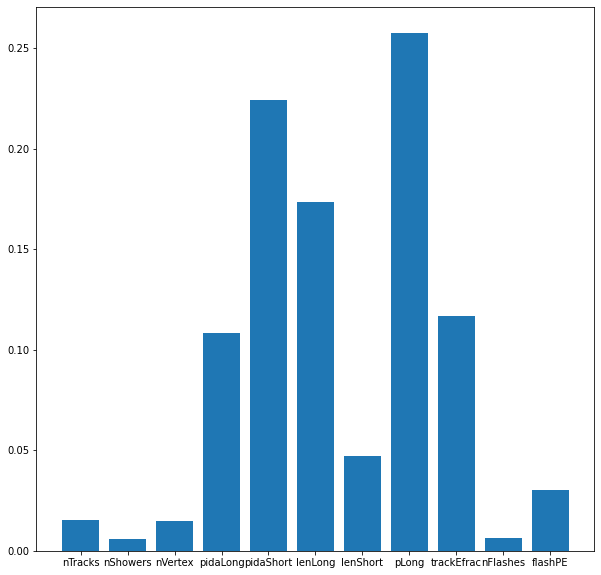

In [29]:
plt.figure(figsize=[10,10])
plt.bar(head_list,gbc.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

In [30]:
gbc.feature_importances_

array([0.01542714, 0.00591473, 0.01491186, 0.10847557, 0.22399434,
       0.17339796, 0.04708746, 0.25740338, 0.11688824, 0.00644275,
       0.03005657])

## What about an SVC? 

In [31]:
svc = svm.NuSVC()
svc.fit(X_train,y_train)
svc_score=svc.score(X_test,y_test)
print (svc_score)

0.7119901112484549


In [32]:
from sklearn.ensemble import RandomForestClassifier
rfC = RandomForestClassifier()
rfC.fit(X_train,y_train)
rfC_score=rfC.score(X_test,y_test)
print (rfC_score)

0.8393077873918418


<BarContainer object of 11 artists>

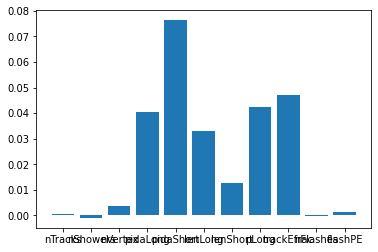

In [33]:
from sklearn.inspection import permutation_importance
pImp = permutation_importance(rfC,X_test,y_test,n_repeats=10,random_state=0)
pImp_df = pd.DataFrame(columns=['Importance'],index = [i for i in X_train.columns])
pImp_df['Importance']= pImp.importances_mean
pImp_df
plt.bar(pImp_df.index,pImp_df.Importance)


In [34]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train,y_train)
NBC_score = NBC.score(X_test,y_test)
print(NBC_score)

0.7428924598269468


In [35]:
from sklearn.neural_network import MLPClassifier
nnCLF = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,10, 5,3,2), random_state=3)
nnCLF.fit(X_train,y_train)
nnCLF_score=nnCLF.score(X_test,y_test)
print(nnCLF_score)

0.6100123609394313


In [36]:
from sklearn.neural_network import MLPClassifier
nnCLF = MLPClassifier(solver = 'adam', learning_rate='invscaling', verbose = 1,random_state=8)
nnCLF.fit(X_train,y_train)
nnCLF_score=nnCLF.score(X_test,y_test)
print(nnCLF_score)

Iteration 1, loss = 5.30668013
Iteration 2, loss = 2.16730438
Iteration 3, loss = 1.21725023
Iteration 4, loss = 0.85611005
Iteration 5, loss = 0.69204638
Iteration 6, loss = 0.69305340
Iteration 7, loss = 0.63988673
Iteration 8, loss = 0.63888410
Iteration 9, loss = 0.67351782
Iteration 10, loss = 0.76432048
Iteration 11, loss = 0.72993174
Iteration 12, loss = 0.72203426
Iteration 13, loss = 0.59886700
Iteration 14, loss = 0.62692889
Iteration 15, loss = 0.58568286
Iteration 16, loss = 0.58776382
Iteration 17, loss = 0.78842000
Iteration 18, loss = 0.75521648
Iteration 19, loss = 0.62207222
Iteration 20, loss = 0.69039343
Iteration 21, loss = 0.73250989
Iteration 22, loss = 0.70924291
Iteration 23, loss = 0.60057284
Iteration 24, loss = 0.56057359
Iteration 25, loss = 0.54901610
Iteration 26, loss = 0.59809175
Iteration 27, loss = 0.72316277
Iteration 28, loss = 0.62517276
Iteration 29, loss = 0.61679799
Iteration 30, loss = 0.57506292
Iteration 31, loss = 0.72203776
Iteration 32, los

AttributeError: 'MLPClassifier' object has no attribute 'validation_scores_'

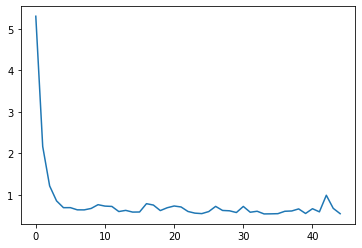

In [39]:
plt.plot(nnCLF.loss_curve_)
plt.plot(nnCLF.validation_scores_)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5,weights = 'distance',algorithm='auto')
neigh.fit(X_train,y_train)
neigh_score=neigh.score(X_test,y_test)
print(neigh_score)

0.7330037082818294


# OKAY, let us do the same thing but for the flash matched set

In [41]:
head_list = ["nTracks","nShowers","nVertex","trkE","EmE","pidaLong","pidaShort","lenLong","lenShort","visE","pLong","trackEfrac","nFlashes","flashPE","sig"]
atmo_flash = pd.read_csv("atmotree_flash.csv",names=head_list,header=None,index_col=False)
pdk_flash = pd.read_csv("pdktree_flash.csv",names=head_list,header=None,index_col=False)

# Signal and background csvs are imported, as well as necessary libraries. Look to see they have expected behavior.

In [42]:
#atmo_flash.head()

In [43]:
#pdk_flash.head()

In [44]:
pdk_fdf = atmo_flash
pdk_fdf=pdk_fdf.append(pdk_flash,ignore_index=True)
pdk_fdf=pdk_fdf.drop(["trkE","EmE","visE"],axis=1)

In [45]:
import seaborn as sb

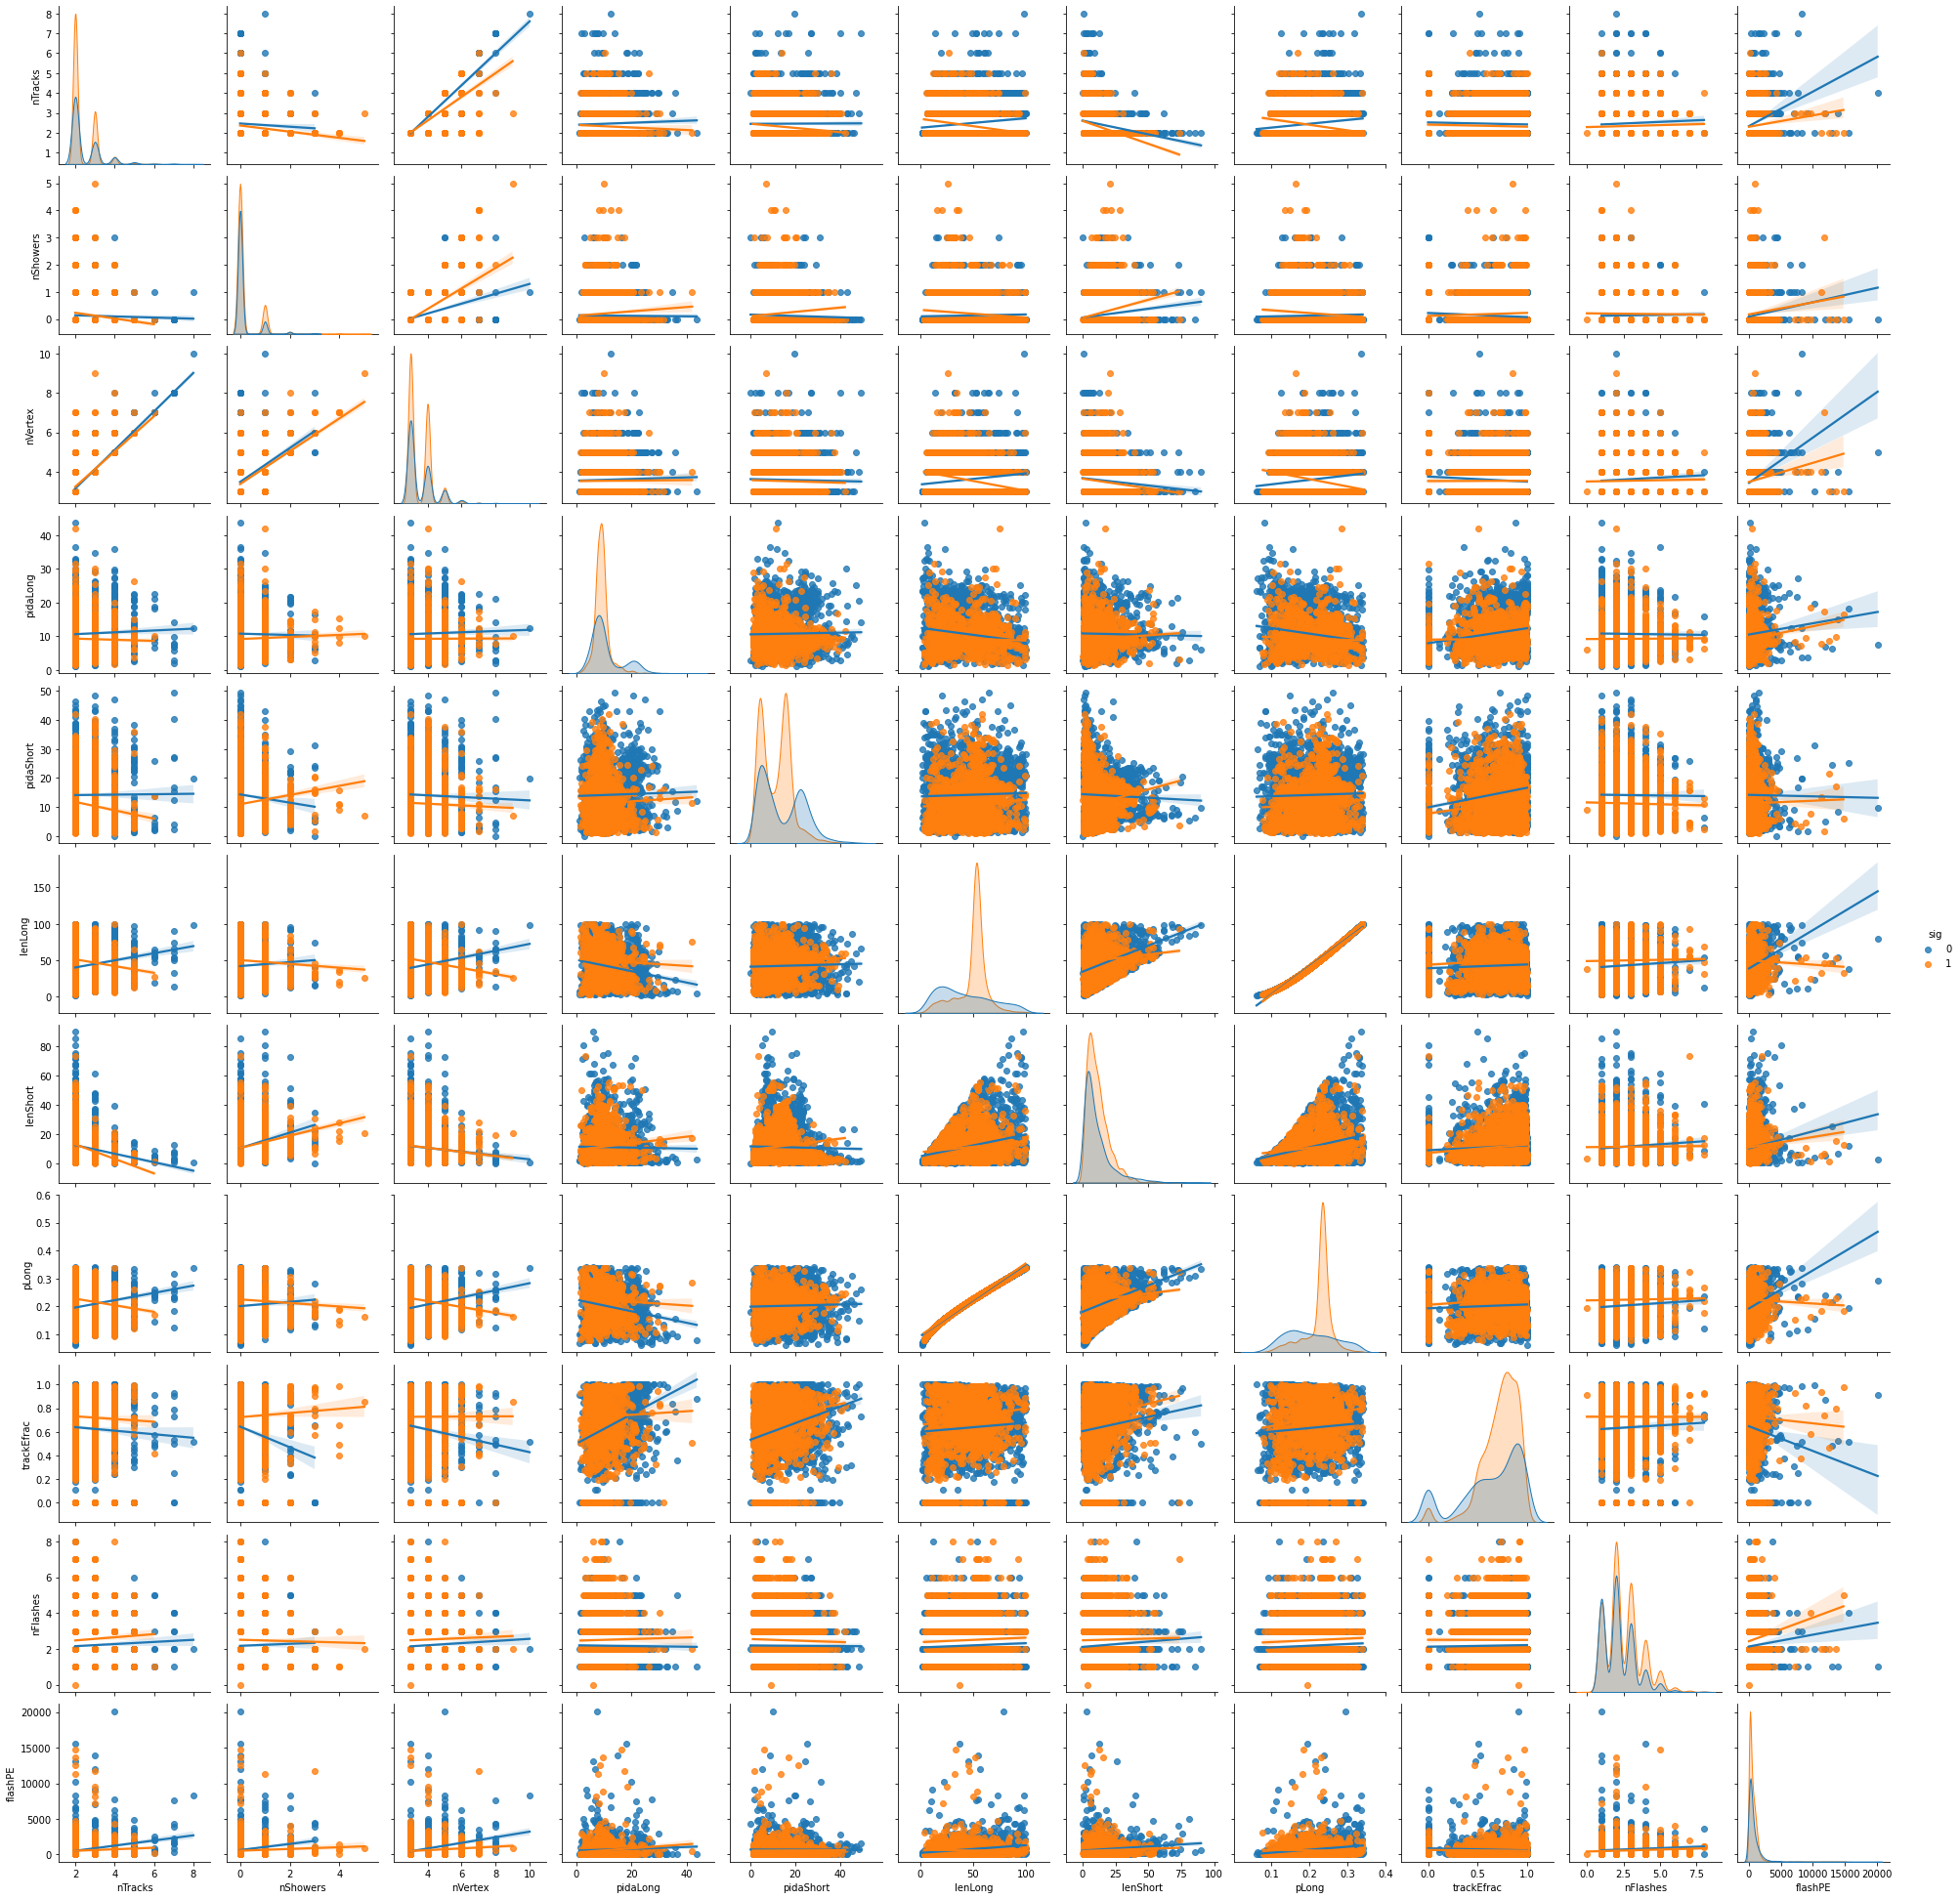

In [46]:
sb.pairplot(data=pdk_fdf,kind="reg",hue="sig")

In [47]:
pdk_ftarget = pdk_fdf.sig

# Pull off the "signal" column to use as the target for our ML models

In [48]:
pdk_ftarget
pdk_fdf=pdk_fdf.drop(["sig"],axis=1)

# Use 70% of the sample as a training set, and split here. Have a look to make sure it makes sense

In [49]:
Xf_train, Xf_test, yf_train, yf_test =train_test_split(pdk_fdf, pdk_ftarget, test_size = 0.3)
Xf_train.head()

nTracks  nShowers  nVertex  pidaLong  pidaShort  lenLong  lenShort  \
1074        2         0        3  19.80480    31.3788  22.6230   3.94646   
3181        2         1        4   8.79588    15.8881  53.5832  18.48160   
1692        2         0        3  18.67510    20.4697  18.0411  14.26160   
2102        2         0        4  14.78950    21.6688  59.9394   8.04586   
3608        2         0        3   9.95329    11.3786  52.5939  16.90510   

         pLong  trackEfrac  nFlashes    flashPE  
1074  0.154260    0.994634         2  10219.400  
3181  0.234670    0.804021         2    311.157  
1692  0.140242    0.999576         1    189.275  
2102  0.249652    0.323540         2    128.335  
3608  0.232313    0.747013         1    902.485

In [50]:
yf_train.head()

1074    0
3181    1
1692    0
2102    0
3608    1
Name: sig, dtype: int64

In [51]:
from sklearn import tree
from sklearn import svm

# Here we make our ML models. First a decision tree, we do nothing special to it and let it find its own path

In [52]:
Fclf=tree.DecisionTreeClassifier()
Fclf.fit(Xf_train,yf_train)

DecisionTreeClassifier()

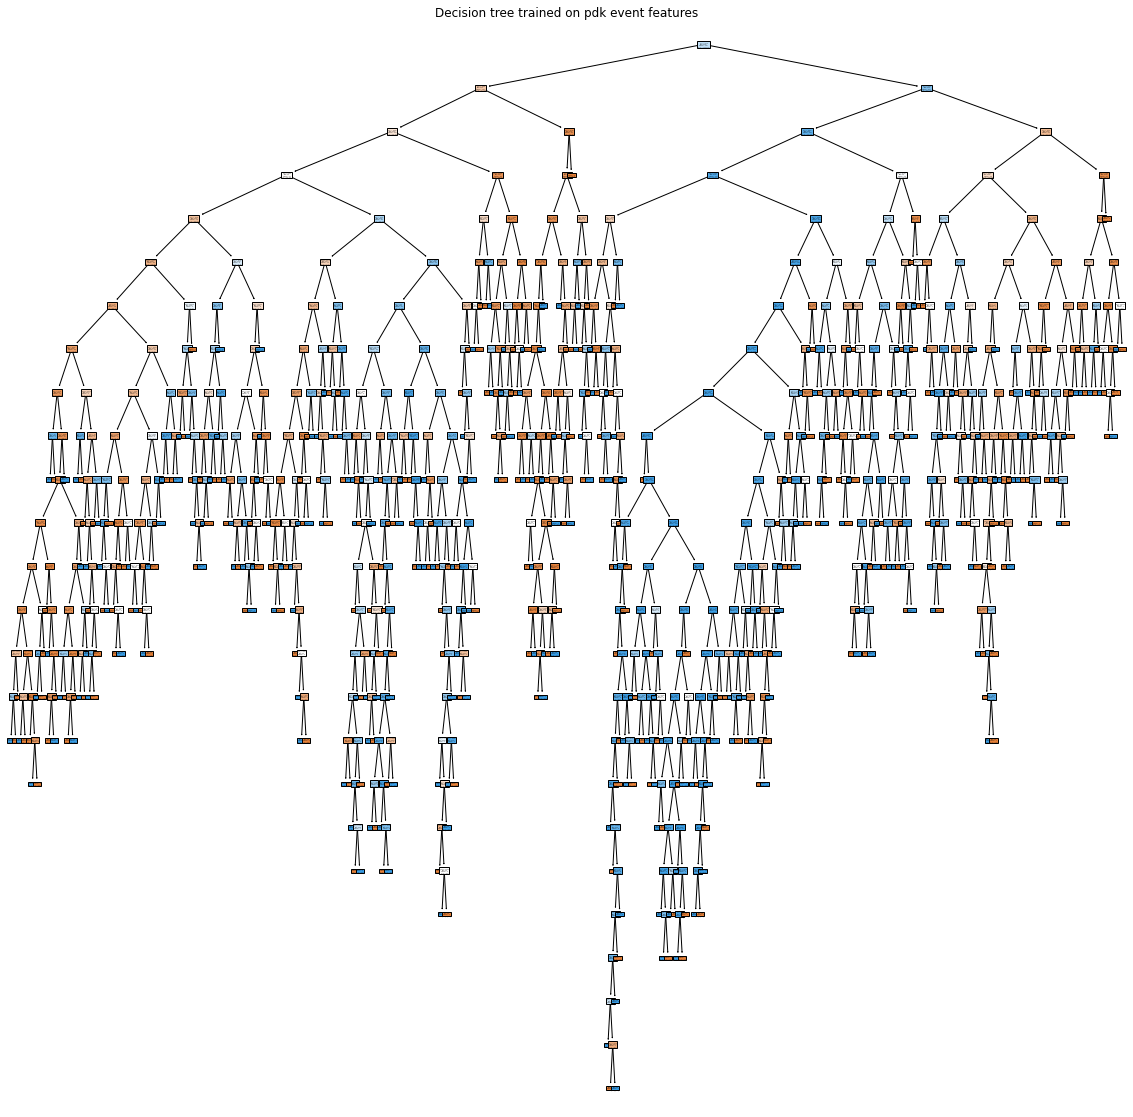

In [53]:
from sklearn.tree import plot_tree
plt.figure(figsize=[20,20])
plot_tree(Fclf, filled=True)
plt.title("Decision tree trained on pdk event features")
plt.show()

In [54]:
Fclf.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1])

In [55]:
Fclf_score= Fclf.score(X_test,y_test)
print("The score of the Decision tree classifier is ", Fclf_score)

The score of the Decision tree classifier is  0.9332509270704573


In [56]:
for i in ["sig","trkE","EmE","visE"]:
    head_list.remove(i)

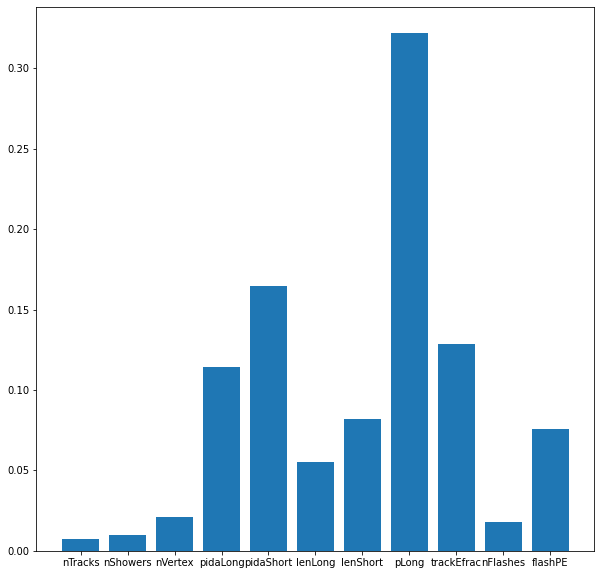

In [57]:
plt.figure(figsize=[10,10])
plt.bar(head_list,Fclf.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

# Here we try a Gradient Boosting Classifier

In [58]:
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [59]:
Fgbc = ensemble.GradientBoostingClassifier()

In [60]:
Fgbc.fit(Xf_train,yf_train)
Fgbc_preds=gbc.predict(Xf_test)

In [61]:
Fgbc_score = Fgbc.score(Xf_test,yf_test)
print(Fgbc_score)

0.8364197530864198


It does pretty okay, but can we improve some

In [62]:
classification_report(yf_test,Fgbc_preds)

'              precision    recall  f1-score   support\n\n           0       0.86      0.79      0.82       688\n           1       0.85      0.90      0.88       932\n\n    accuracy                           0.85      1620\n   macro avg       0.86      0.85      0.85      1620\nweighted avg       0.86      0.85      0.85      1620\n'

In [63]:
confusion_matrix(yf_test,Fgbc_preds)

array([[544, 144],
       [ 91, 841]])

In [64]:
yf_scores_gb = Fgbc.decision_function(Xf_test)
ffpr_gb, ftpr_gb, _ = roc_curve(yf_test, yf_scores_gb)
froc_auc_gb = auc(ffpr_gb, ftpr_gb)

print("Area under ROC curve = {:0.2f}".format(froc_auc_gb))

Area under ROC curve = 0.91


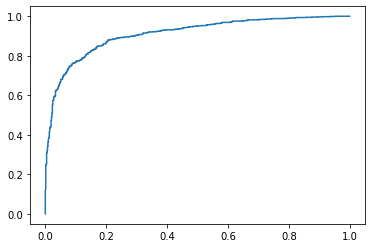

In [65]:
plt.figure()
plt.plot(ffpr_gb,ftpr_gb)

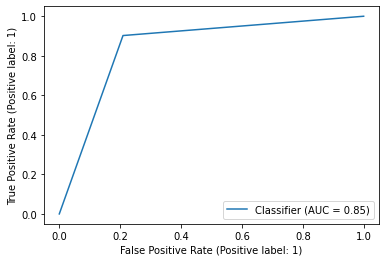

In [66]:
RocCurveDisplay.from_predictions(yf_test,Fgbc_preds)

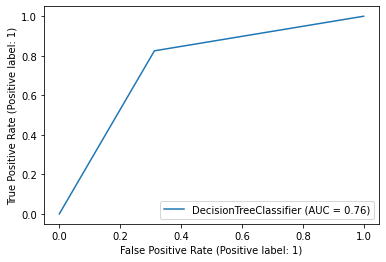

In [67]:
RocCurveDisplay.from_estimator(Fclf,Xf_test,yf_test)

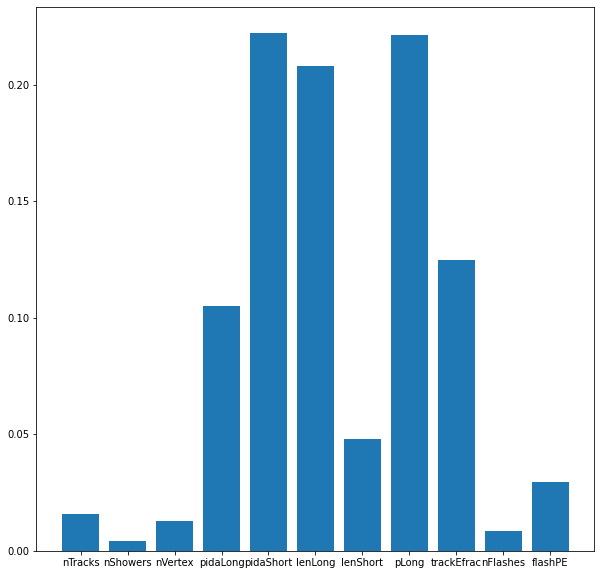

In [68]:
plt.figure(figsize=[10,10])
plt.bar(head_list,Fgbc.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

In [69]:
Fgbc.feature_importances_

array([0.01564965, 0.00440045, 0.01258878, 0.10512569, 0.22217976,
       0.2078456 , 0.04806402, 0.2212608 , 0.12491138, 0.00858393,
       0.02938994])

# What about an SVC? 

In [70]:
Fgbc5 = ensemble.GradientBoostingClassifier(learning_rate=.01,n_estimators=10000)
Fgbc5.fit(Xf_train,yf_train)
Fgbc5.score(Xf_test,yf_test)

0.8345679012345679

In [71]:
Fsvc = svm.NuSVC()
Fsvc.fit(Xf_train,yf_train)
Fsvc_score = Fsvc.score(Xf_test,yf_test)
print(Fsvc_score)

0.5530864197530864


In [72]:
FrfC = RandomForestClassifier()
FrfC.fit(Xf_train,yf_train)
FrfC_score=rfC.score(Xf_test,yf_test)
print (FrfC_score)

0.9487654320987654


<BarContainer object of 11 artists>

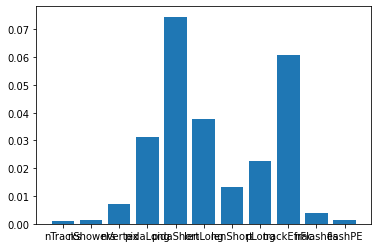

In [73]:
FpImp = permutation_importance(FrfC,Xf_test,yf_test,n_repeats=10,random_state=0)
FpImp_df = pd.DataFrame(columns=['Importance'],index = [i for i in Xf_train.columns])
FpImp_df['Importance']= FpImp.importances_mean
FpImp_df
plt.bar(FpImp_df.index,FpImp_df.Importance)



In [74]:
FNBC = GaussianNB()
FNBC.fit(Xf_train,yf_train)
FNBC_score = NBC.score(Xf_test,yf_test)
print(FNBC_score)

0.7296296296296296


In [75]:
from sklearn.neural_network import MLPClassifier
FnnCLF = MLPClassifier(solver='adam', alpha=1e-5)
FnnCLF.fit(Xf_train,yf_train)
FnnCLF_score = FnnCLF.score(Xf_test,yf_test)

In [76]:
FnnCLF = MLPClassifier(solver = 'adam', learning_rate='invscaling', verbose = 1,random_state=8)
FnnCLF.fit(Xf_train,yf_train)
FnnCLF_score=nnCLF.score(Xf_test,yf_test)
print(FnnCLF_score)

Iteration 1, loss = 5.11985690
Iteration 2, loss = 1.80343472
Iteration 3, loss = 1.01127977
Iteration 4, loss = 0.71367451
Iteration 5, loss = 0.74266551
Iteration 6, loss = 0.63808586
Iteration 7, loss = 0.65038930
Iteration 8, loss = 0.69035943
Iteration 9, loss = 0.72145199
Iteration 10, loss = 0.62612036
Iteration 11, loss = 0.59786439
Iteration 12, loss = 0.73027889
Iteration 13, loss = 0.74633384
Iteration 14, loss = 0.60957235
Iteration 15, loss = 0.68507979
Iteration 16, loss = 0.64401018
Iteration 17, loss = 0.55997454
Iteration 18, loss = 0.59585326
Iteration 19, loss = 0.62517403
Iteration 20, loss = 0.61414973
Iteration 21, loss = 0.55955613
Iteration 22, loss = 0.60318439
Iteration 23, loss = 0.54554681
Iteration 24, loss = 0.55261347
Iteration 25, loss = 0.53424454
Iteration 26, loss = 0.54915880
Iteration 27, loss = 0.55725416
Iteration 28, loss = 0.57062874
Iteration 29, loss = 0.60720480
Iteration 30, loss = 0.71020449
Iteration 31, loss = 0.69315974
Iteration 32, los

# How do the scores match up?

In [77]:
scores_df_dict = {"Classifier":["DecTree","GBC","SVC","NN","RanForest","NaiveBayes"],
                  "Prod":[clf_score,gbc_score,svc_score,nnCLF_score,rfC_score,NBC_score],
                  "Flash Matched":[Fclf_score,Fgbc_score,Fsvc_score,FnnCLF_score,FrfC_score,FNBC_score]}
scores_df=pd.DataFrame(scores_df_dict)
scores_df=scores_df.set_index("Classifier")

<AxesSubplot:xlabel='Classifier', ylabel='Score'>

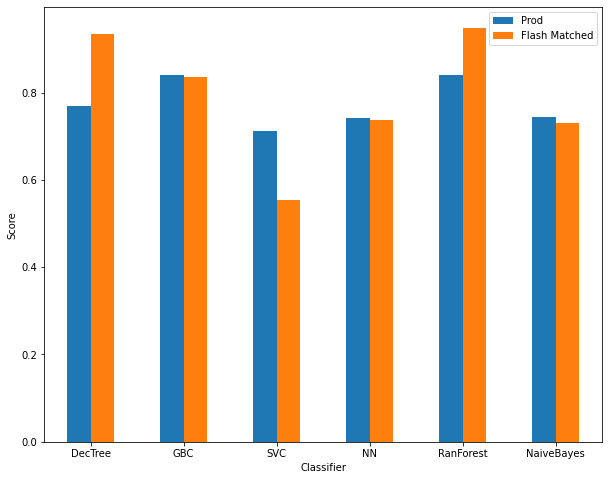

In [78]:
scores_df.plot(kind="bar",figsize=[10,8],ylabel="Score",rot=0)

## Since the parameter space for the PDK is so high, it the 'simpler' models seem to perform better - though, there is very little tuning done here

Text(-0.01599245505081641, flashPE, 'Flash Matched')

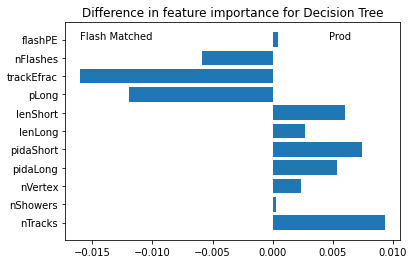

In [79]:
import_diff = clf.feature_importances_ - Fclf.feature_importances_
Flabel_x = import_diff.min()
label_x = (import_diff.max()+import_diff.mean())/2
plt.figure()
plt.barh(head_list,width=import_diff,)
plt.title("Difference in feature importance for Decision Tree")
plt.annotate("Prod",xy=[label_x,"flashPE"])
plt.annotate("Flash Matched",xy=[Flabel_x,"flashPE"])

Text(-0.03444763498210793, flashPE, 'Flash Matched')

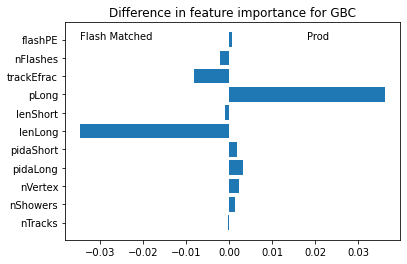

In [80]:
import_diff = gbc.feature_importances_ - Fgbc.feature_importances_
Flabel_x = (import_diff.min())
label_x = (import_diff.max()+import_diff.mean())/2
plt.figure()
plt.barh(head_list,width=import_diff,)
plt.title("Difference in feature importance for GBC")
plt.annotate("Prod",xy=[label_x,"flashPE"])
plt.annotate("Flash Matched",xy=[Flabel_x,"flashPE"])

Text(-0.009930201410423917, flashPE, 'Flash Matched')

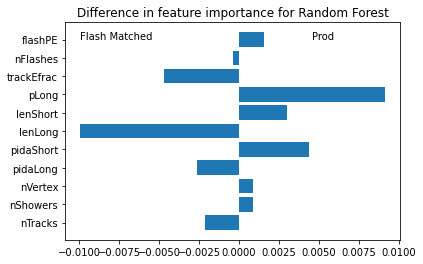

In [81]:
import_diff = rfC.feature_importances_ - FrfC.feature_importances_
Flabel_x = import_diff.min()
label_x = (import_diff.max()+import_diff.mean())/2
plt.figure()
plt.barh(head_list,width=import_diff,)
plt.title("Difference in feature importance for Random Forest")
plt.annotate("Prod",xy=[label_x,"flashPE"])
plt.annotate("Flash Matched",xy=[Flabel_x,"flashPE"])

# It seems the importance of the enery (momentum) increases when better t0 matching (flash matching) is implemented?

Text(-6, 200, 'Kolmogorov-Smirnov test:\n sig(bkg) probability: 0.241 (0.0071)')

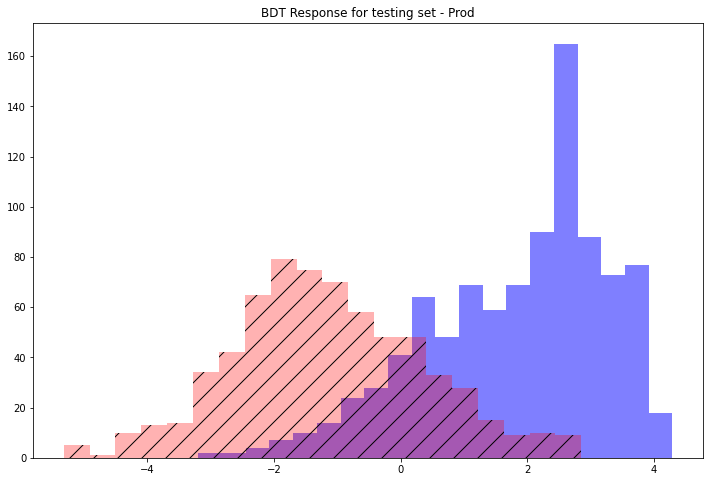

In [82]:
from scipy.stats import ks_2samp
plt.figure(figsize=[12,8])
plotset = X_test.join(y_test)

plotset_sig = plotset[plotset.sig==1].drop('sig',axis=1)
plotset_bckgd = plotset[plotset.sig==0].drop('sig',axis=1)
plt.hist(gbc.decision_function(plotset_sig),color='blue',histtype='bar',alpha=.5,bins=20)
plt.hist(gbc.decision_function(plotset_bckgd),color='red',histtype='bar',alpha=.3,hatch='/',bins=20)
plt.title("BDT Response for testing set - Prod")

trainset = X_train.join(y_train)

trainset_sig = trainset[trainset.sig==1].drop('sig',axis=1)
trainset_bckgd = trainset[trainset.sig==0].drop('sig',axis=1)

sig_kstat, sig_kp = ks_2samp(gbc.decision_function(trainset_sig),gbc.decision_function(plotset_sig))
bkg_kstat, bkg_kp = ks_2samp(gbc.decision_function(trainset_bckgd),gbc.decision_function(plotset_bckgd))
plt.annotate(("Kolmogorov-Smirnov test:\n sig(bkg) probability: "
              +str(round(sig_kp,3))+" ("+str(round(bkg_kp,5))+")"),xy=[-6,200])

Text(-5, 250, 'Kolmogorov-Smirnov test:\n sig(bkg) probability: 0.274 (3e-05)')

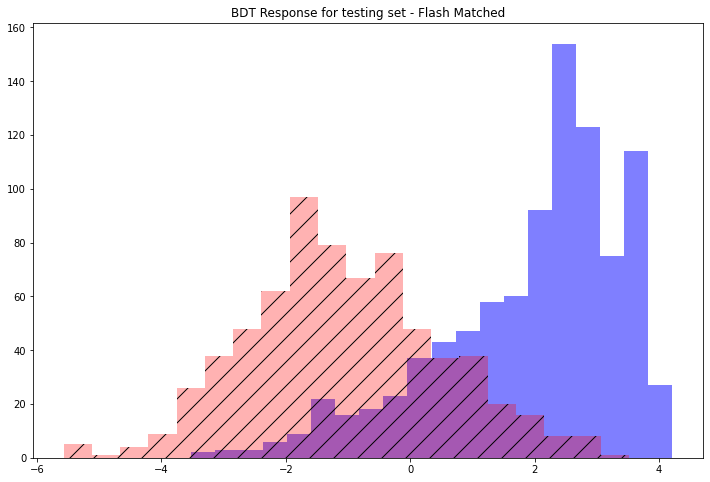

In [83]:
fplotset = Xf_test.join(yf_test)
plt.figure(figsize=[12,8])

fplotset_sig = fplotset[fplotset.sig==1].drop('sig',axis=1)
fplotset_bckgd = fplotset[fplotset.sig==0].drop('sig',axis=1)
plt.hist(Fgbc.decision_function(fplotset_sig),color='blue',histtype='bar',alpha=.5,bins=20)
plt.hist(Fgbc.decision_function(fplotset_bckgd),color='red',histtype='bar',alpha=.3,hatch='/',bins=20)
plt.title("BDT Response for testing set - Flash Matched")

ftrainset = Xf_train.join(yf_train)

ftrainset_sig = ftrainset[ftrainset.sig==1].drop('sig',axis=1)
ftrainset_bckgd = ftrainset[ftrainset.sig==0].drop('sig',axis=1)

fsig_kstat, fsig_kp = ks_2samp(Fgbc.decision_function(ftrainset_sig),Fgbc.decision_function(fplotset_sig))
fbkg_kstat, fbkg_kp = ks_2samp(Fgbc.decision_function(ftrainset_bckgd),Fgbc.decision_function(fplotset_bckgd))
plt.annotate(("Kolmogorov-Smirnov test:\n sig(bkg) probability: "
              +str(round(fsig_kp,3))+" ("+str(round(fbkg_kp,5))+")"),xy=[-5,250])

# OKAY HERE WE HAVE XENON NOW

In [179]:
head_list = ["nTracks","nShowers","nVertex","trkE","EmE","pidaLong","pidaShort","lenLong","lenShort","visE","pLong","trackEfrac","nFlashes","flashPE","sig"]
atmo_xenon = pd.read_csv("xenon_atmo.csv",names=head_list,header=None,index_col=False)
pdk_xenon = pd.read_csv("xenon_pdk.csv",names=head_list,header=None,index_col=False)
pdk_xenon = pdk_xenon[0:1000]
pdk_xenon.count()

nTracks       1000
nShowers      1000
nVertex       1000
trkE          1000
EmE           1000
pidaLong      1000
pidaShort     1000
lenLong       1000
lenShort      1000
visE          1000
pLong         1000
trackEfrac    1000
nFlashes      1000
flashPE       1000
sig           1000
dtype: int64

# Signal and background csvs are imported, as well as necessary libraries. Look to see they have expected behavior.

In [180]:
#atmo_flash.head()

In [181]:
#pdk_flash.head()

In [182]:
pdk_xdf = atmo_xenon
pdk_xdf=pdk_xdf.append(pdk_xenon,ignore_index=True)
pdk_xdf=pdk_xdf.drop(["trkE","EmE","visE"],axis=1)

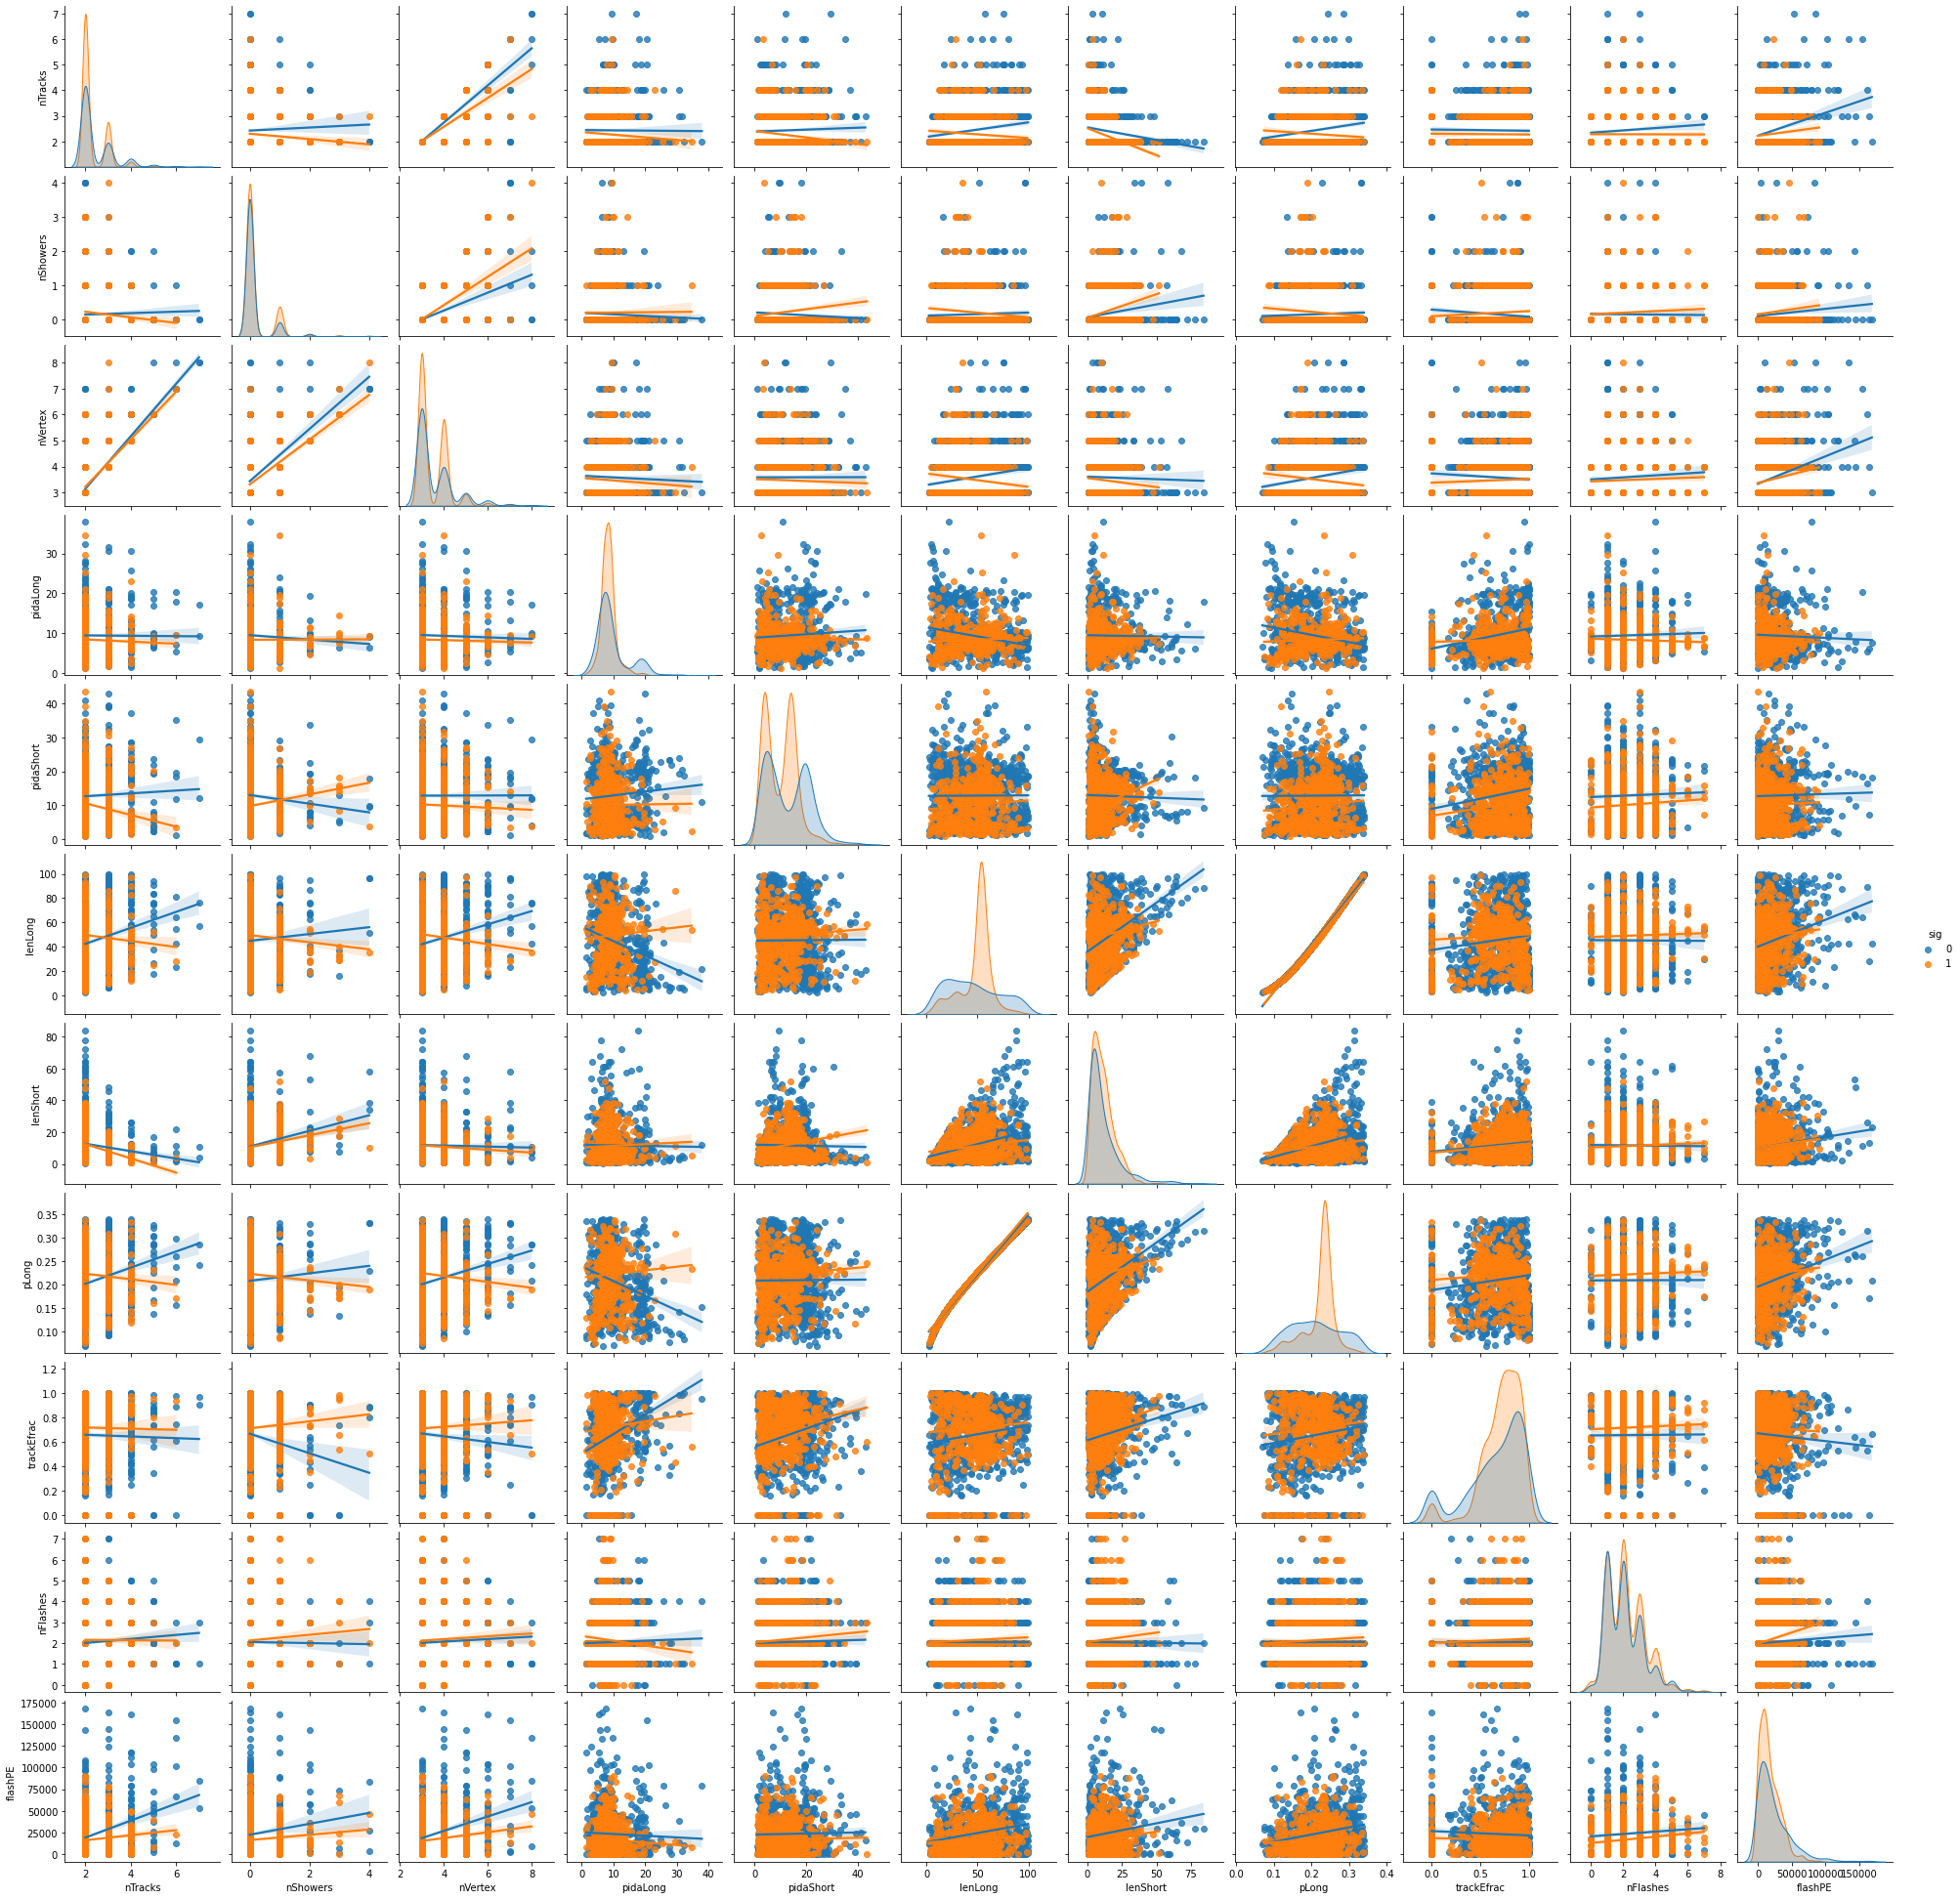

In [183]:
sb.pairplot(data=pdk_xdf,kind="reg",hue="sig")

In [184]:
pdk_xtarget = pdk_xdf.sig

# Pull off the "signal" column to use as the target for our ML models

In [185]:
pdk_xtarget
pdk_xdf=pdk_xdf.drop(["sig"],axis=1)

# Use 70% of the sample as a training set, and split here. Have a look to make sure it makes sense

In [186]:
Xx_train, Xx_test, yx_train, yx_test =train_test_split(pdk_xdf, pdk_xtarget, test_size = 0.3)
Xx_train.head()

nTracks  nShowers  nVertex  pidaLong  pidaShort  lenLong  lenShort  \
291         2         1        4   4.29449   17.70790  15.5779   7.91740   
904         2         0        3   8.78829   16.17310  26.0272  19.95090   
6           3         0        4   7.15611    7.45383  25.2096   1.49983   
1529        2         0        3  12.92560    2.59027  30.4228   5.29793   
1035        3         2        6   7.20530    9.93599  35.3000  20.75010   

         pLong  trackEfrac  nFlashes   flashPE  
291   0.132128    0.997743         2   1446.81  
904   0.164148    0.595301         3  18091.30  
6     0.161806    0.920453         2  11784.20  
1529  0.176407    0.529059         1  30838.90  
1035  0.189420    0.834705         1  29766.60

In [187]:
yx_train.head()

291     0
904     1
6       0
1529    1
1035    1
Name: sig, dtype: int64

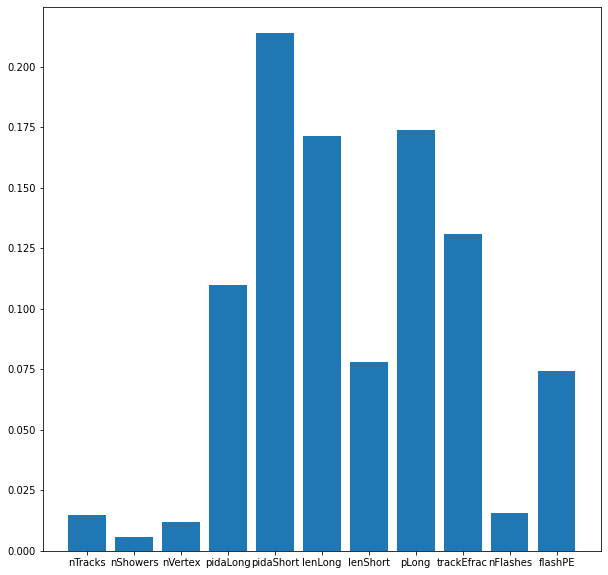

In [188]:
Xclf=tree.DecisionTreeClassifier()
Xclf.fit(Xx_train,yx_train)
Xclf_score= Xclf.score(Xx_test,yx_test)
for i in ["sig","trkE","EmE","visE"]:
    head_list.remove(i)
plt.figure(figsize=[10,10])
plt.bar(head_list,Xclf.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

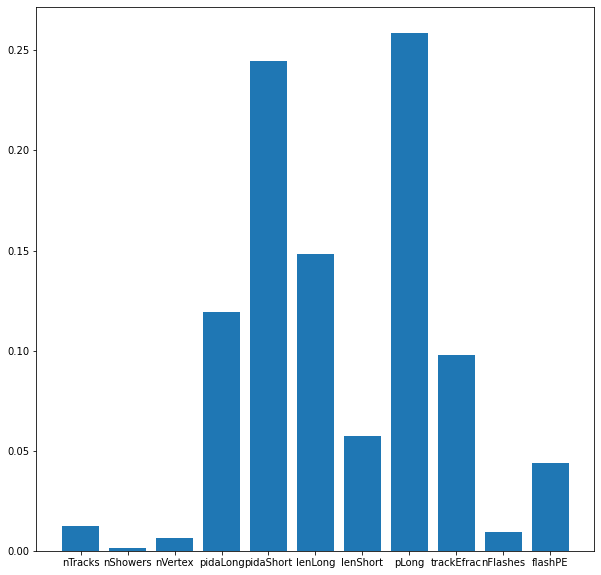

In [189]:
Xgbc = ensemble.GradientBoostingClassifier()
Xgbc.fit(Xx_train,yx_train)
Xgbc_preds=gbc.predict(Xx_test)
Xgbc_score = Xgbc.score(Xx_test,yx_test)
plt.figure(figsize=[10,10])
plt.bar(head_list,Xgbc.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

In [190]:
Xgbc5 = ensemble.GradientBoostingClassifier(learning_rate=.01,n_estimators=10000)
Xgbc5.fit(Xx_train,yx_train)
Xgbc5.score(Xx_test,yx_test)

0.7964285714285714

In [191]:
Xsvc = svm.NuSVC(nu=.04)
Xsvc.fit(Xx_train,yx_train)
Xsvc_score = Fsvc.score(Xx_test,yx_test)
print(Xsvc_score)

0.4607142857142857


In [192]:
XrfC = RandomForestClassifier()
XrfC.fit(Xx_train,yx_train)
XrfC_score=rfC.score(Xx_test,yx_test)
print (XrfC_score)

0.7464285714285714


<BarContainer object of 11 artists>

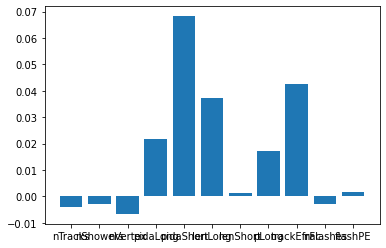

In [193]:
XpImp = permutation_importance(XrfC,Xx_test,yx_test,n_repeats=10,random_state=0)
XpImp_df = pd.DataFrame(columns=['Importance'],index = [i for i in Xx_train.columns])
XpImp_df['Importance']= XpImp.importances_mean
XpImp_df
plt.bar(XpImp_df.index,XpImp_df.Importance)




In [194]:
XNBC = GaussianNB()
XNBC.fit(Xx_train,yx_train)
XNBC_score = NBC.score(Xx_test,yx_test)
print(XNBC_score)

0.5142857142857142


In [195]:
from sklearn.neural_network import MLPClassifier
XnnCLF = MLPClassifier(solver='adam', alpha=1e-5)
XnnCLF.fit(Xx_train,yx_train)
XnnCLF_score = XnnCLF.score(Xx_test,yx_test)

<AxesSubplot:xlabel='Classifier', ylabel='Score'>

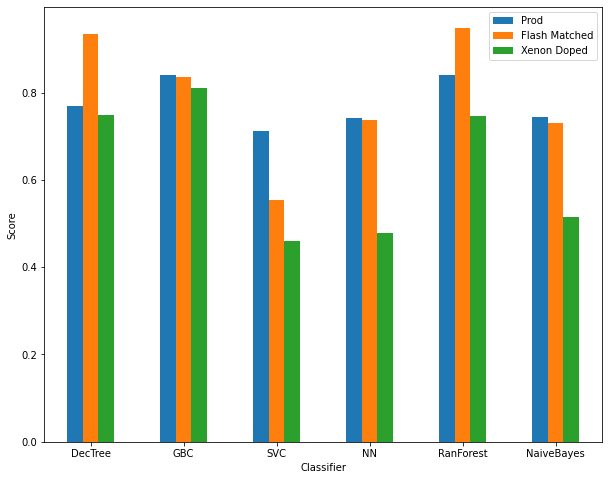

In [196]:
scores_df_dict = {"Classifier":["DecTree","GBC","SVC","NN","RanForest","NaiveBayes"],
                  "Prod":[clf_score,gbc_score,svc_score,nnCLF_score,rfC_score,NBC_score],
                  "Flash Matched":[Fclf_score,Fgbc_score,Fsvc_score,FnnCLF_score,FrfC_score,FNBC_score],
                  "Xenon Doped":[Xclf_score,Xgbc_score,Xsvc_score,XnnCLF_score,XrfC_score,XNBC_score]}
scores_df=pd.DataFrame(scores_df_dict)
scores_df=scores_df.set_index("Classifier")
scores_df.plot(kind="bar",figsize=[10,8],ylabel="Score",rot=0)

Text(-0.11611214328975004, flashPE, 'Xenon Doped')

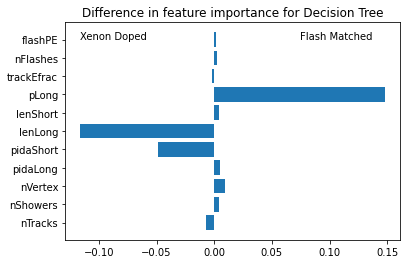

In [197]:
import_diff = Fclf.feature_importances_ - Xclf.feature_importances_
Flabel_x = import_diff.min()
label_x = (import_diff.max()+import_diff.mean())/2
plt.figure()
plt.barh(head_list,width=import_diff,)
plt.title("Difference in feature importance for Decision Tree")
plt.annotate("Flash Matched",xy=[label_x,"flashPE"])
plt.annotate("Xenon Doped",xy=[Flabel_x,"flashPE"])

Text(-0.006949995709699938, flashPE, 'Xenon Doped')

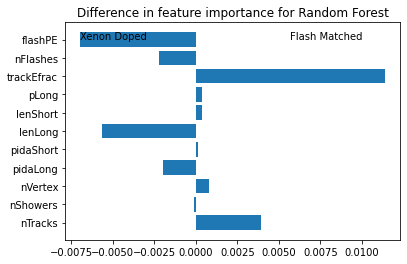

In [198]:
import_diff = FrfC.feature_importances_ - XrfC.feature_importances_
Flabel_x = import_diff.min()
label_x = (import_diff.max()+import_diff.mean())/2
plt.figure()
plt.barh(head_list,width=import_diff,)
plt.title("Difference in feature importance for Random Forest")
plt.annotate("Flash Matched",xy=[label_x,"flashPE"])
plt.annotate("Xenon Doped",xy=[Flabel_x,"flashPE"])

In [199]:
Xx_test.count()

nTracks       560
nShowers      560
nVertex       560
pidaLong      560
pidaShort     560
lenLong       560
lenShort      560
pLong         560
trackEfrac    560
nFlashes      560
flashPE       560
dtype: int64

Text(-6, 200, 'Kolmogorov-Smirnov test:\n sig(bkg) probability: 0.049 (0.00067)')

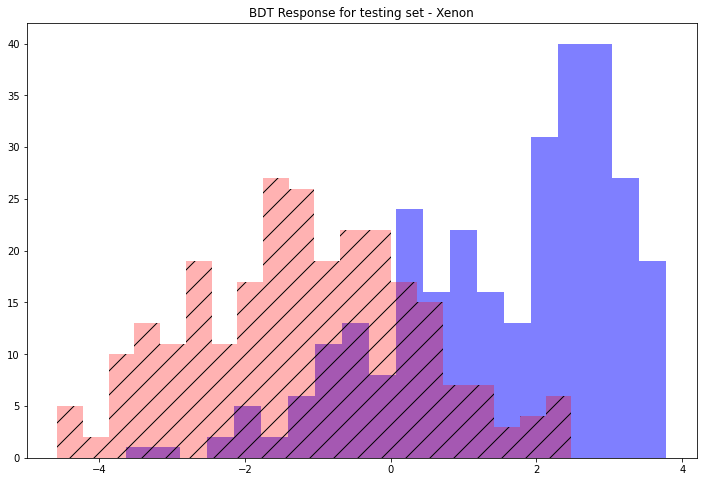

In [200]:
plt.figure(figsize=[12,8])
plotset = Xx_test.join(yx_test)

plotset_sig = plotset[plotset.sig==1].drop('sig',axis=1)
plotset_bckgd = plotset[plotset.sig==0].drop('sig',axis=1)
plt.hist(Xgbc.decision_function(plotset_sig),color='blue',histtype='bar',alpha=.5,bins=20)
plt.hist(Xgbc.decision_function(plotset_bckgd),color='red',histtype='bar',alpha=.3,hatch='/',bins=20)
plt.title("BDT Response for testing set - Xenon")

trainset = Xx_train.join(yx_train)

trainset_sig = trainset[trainset.sig==1].drop('sig',axis=1)
trainset_bckgd = trainset[trainset.sig==0].drop('sig',axis=1)

sig_kstat, sig_kp = ks_2samp(Xgbc.decision_function(trainset_sig),Xgbc.decision_function(plotset_sig))
bkg_kstat, bkg_kp = ks_2samp(Xgbc.decision_function(trainset_bckgd),Xgbc.decision_function(plotset_bckgd))
plt.annotate(("Kolmogorov-Smirnov test:\n sig(bkg) probability: "
              +str(round(sig_kp,3))+" ("+str(round(bkg_kp,5))+")"),xy=[-6,200])